<a href="https://colab.research.google.com/github/pingwx/ya.prac/blob/main/08_ML_in_business/08_EN_ML_in_business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oil well location selection

We have data on oil samples in three regions: in each of 10,000 oilfields, where the quality of oil and the volume of its reserves were measured. The customer, the mining company GlavRosGosNeft, asks us to determine where to drill new wells.

**Steps for choosing a location:**

- Find oilfields in the selected region. For each oilfield determine the values of the features;
- Build a model and estimate the volume of reserves;
- Choose the oilfields with the highest estimated value of reserves. The number of oilfields depends on the company's budget and the cost of developing one well;
- The profit is equal to the total profit of the selected oilfields.

**Conditions of the problem:**

- Only linear regression is suitable for training the model (the rest are not predictable enough).
- When exploring the region, 500 points are explored, from which, using machine learning, the best 200 are selected for development.
- The budget for the development of wells in the region is 10 billion rubles.
- At current prices, one barrel of raw materials brings 450 rubles of income. The income from each unit of the product is 450 thousand rubles, since the volume is indicated in thousands of barrels.
- After assessing the risks, we should leave only those regions in which the probability of losses is less than 2.5%. Among them, choose the region with the highest average profit.

The customer asks to choose the best region, analyze possible profits and risks.


**Data Description:**

Geological exploration data of three regions are in the files:
- `geo_data_0.csv`.
- `geo_data_1.csv`. 
- `geo_data_2.csv`. 
- `id` — unique well identifier;
- `f0`, `f1`, `f2` — three features of points (no matter what they mean);
- `product` — volume of reserves in the well (thousand barrels).

## Loading and preparing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy import stats
state = np.random.RandomState(12345)

Let's sequentially load data from three datasets, look at the distribution of features and the target feature `product`

### Region 0:

In [3]:
geo_data_0 = pd.read_csv('/content/geo_data_0.csv')
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


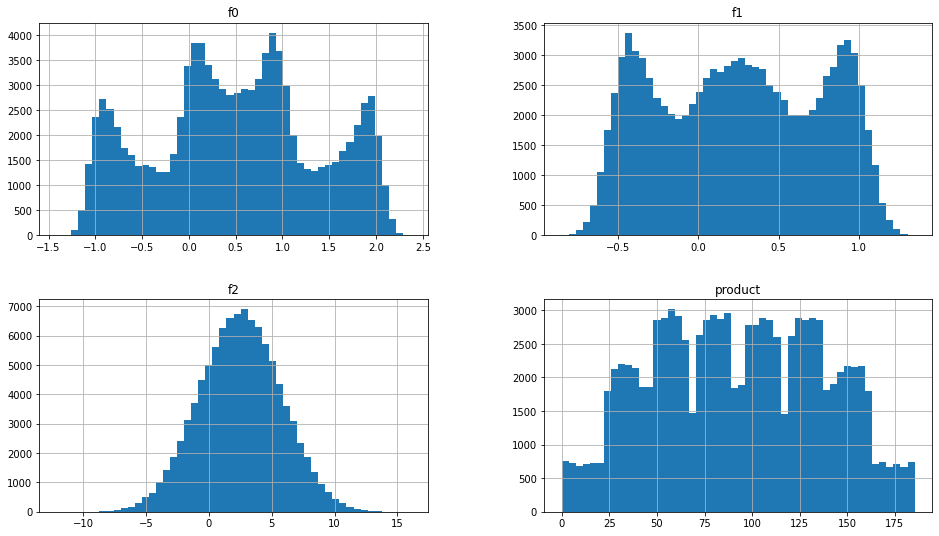

In [4]:
geo_data_0.hist(figsize=(16,9), bins=50);

### Region 1:

In [5]:
geo_data_1 = pd.read_csv('/content/geo_data_1.csv')
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


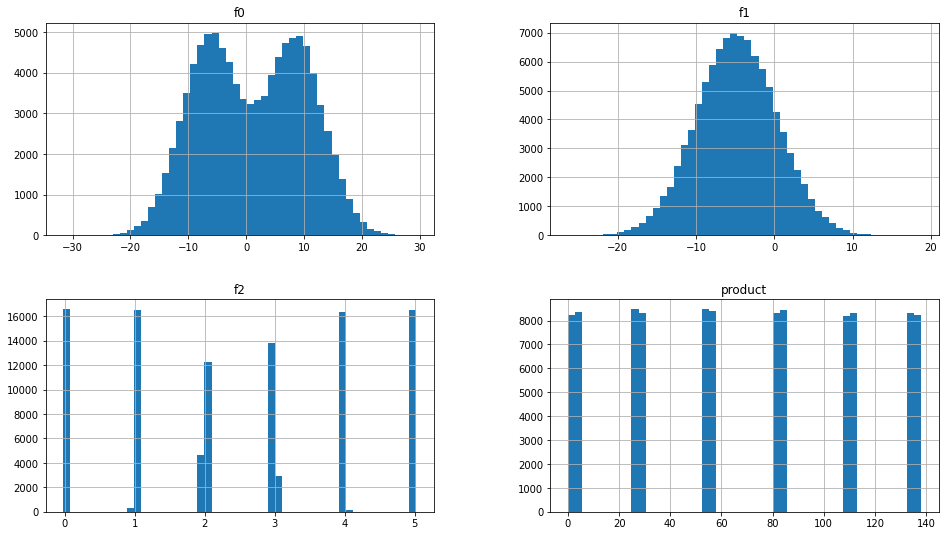

In [6]:
geo_data_1.hist(figsize=(16,9), bins=50);

### Region 2:

In [7]:
geo_data_2 = pd.read_csv('/content/geo_data_2.csv')
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


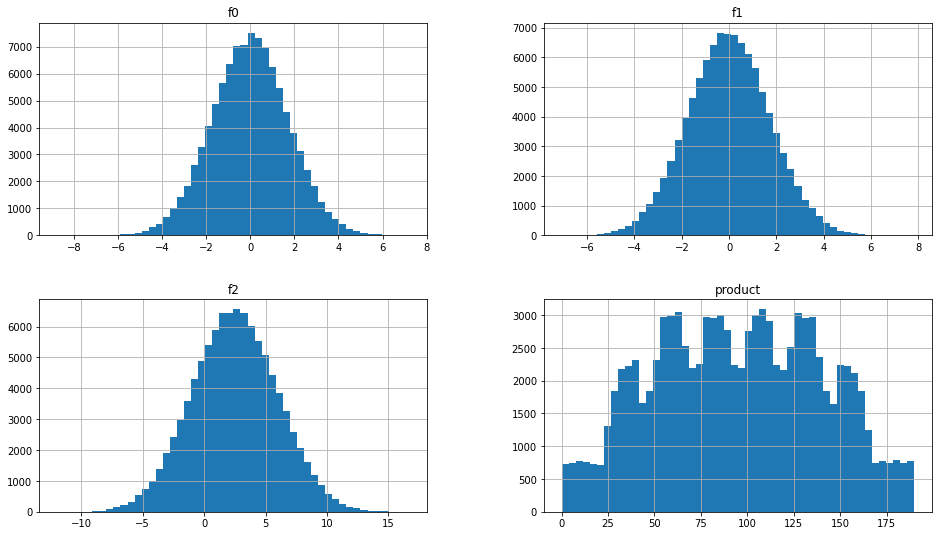

In [8]:
geo_data_2.hist(figsize=(16,9), bins=50);

### Conclusion:

Datasets are loaded. We made sure that there are no gaps in the datasets, and their length corresponds to the one stated in the condition. Note that the features in the three regions are distributed very differently. The distributions in region 2 are most similar to normal. In region 0, features `f1` and `f0` have peaks at the edges, and feature `f2` is normally distributed. In region 1, the feature `f2` actually has a discrete form. The target attribute `product` in all regions has a very uneven distribution, and in region 1 it has an almost discrete form.

## Train and validate the model

For each region, we will train its own model. To avoid code duplication, let's define a function in which:

- form `X` - a set of features `f0`, `f1`, `f2`
- form `y` - target feature `product`
- divide the sample into training and validation in the ratio 3:1
- standardize features `f0`, `f1`, `f2`
- train the linear regression model on the training set
- make predictions on the validation set
- calculate RMSE
- save the `result` dataset with two columns `predict` and `target` which will store the predicted and target values, respectively
- return the RMSE value and the `result` dataset

In [9]:
def train_model(data):
    X = data[['f0', 'f1', 'f2']]
    y = data['product']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12345)
    stdsc = StandardScaler()
    X_train = stdsc.fit_transform(X_train)
    X_valid = stdsc.transform(X_valid)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predict = model.predict(X_valid)
    rmse = mean_squared_error(predict, y_valid) ** 0.5
    result = pd.DataFrame()
    result['predict'] = predict
    result['target'] = y_valid.to_numpy()
    return rmse, result

### Region 0:

In [10]:
rmse_0, result_0 = train_model(geo_data_0)
print('Average stock of predicted raw materials in region 0:', '%.2f'%result_0['predict'].mean())
print('Model RMSE', '%.2f'%rmse_0)

Average stock of predicted raw materials in region 0: 92.59
Model RMSE 37.58


### Region 1:

In [11]:
rmse_1, result_1 = train_model(geo_data_1)
print('Average stock of predicted raw materials in region 1:', '%.2f'%result_1['predict'].mean())
print('Model RMSE', '%.2f'%rmse_1)

Average stock of predicted raw materials in region 1: 68.73
Model RMSE 0.89


### Region 2:

In [12]:
rmse_2, result_2 = train_model(geo_data_2)
print('Average stock of predicted raw materials in region 2:', '%.2f'%result_2['predict'].mean())
print('Model RMSE', '%.2f'%rmse_2)

Average stock of predicted raw materials in region 2: 94.97
Model RMSE 40.03


### Conclusion:

We observe that the values of the average stock and RMSE for regions 0 and 2 are similar to each other, and in region 1 the average value is significantly lower. However, region 1 has a suspiciously low RMSE. Let's try to figure out how it happened:

In [13]:
geo_data_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


We see that in region 1 the `f2` and `product` columns are linearly dependent, this explains such a low prediction error. In regions 0 and 2, there is no linear relationship between features and the target. Let's build three-dimensional scatter plots with feature distributions `f0`, `f1`, `f2`. The color of the dots will change depending on the corresponding values of `product`.

In [14]:
def show_f0123_scatter(data, alpha=0.12, elev=20,  azim=20):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('f0', fontsize=20)
    ax.set_ylabel('f1', fontsize=20)
    ax.set_zlabel('f2', fontsize=20)
    ax.view_init(elev=elev, azim=azim)
    scat_plot = ax.scatter(data['f0'], data['f1'], data['f2'], c=data['product'], alpha=alpha)
    cb = plt.colorbar(scat_plot)
    num_ticks = 20
    ticks = [j*data['product'].max()/num_ticks for j in range(num_ticks)]
    cb.set_ticks(ticks)
    cb.set_label('product', size=20)
    plt.show()

Some beautiful pictures :)

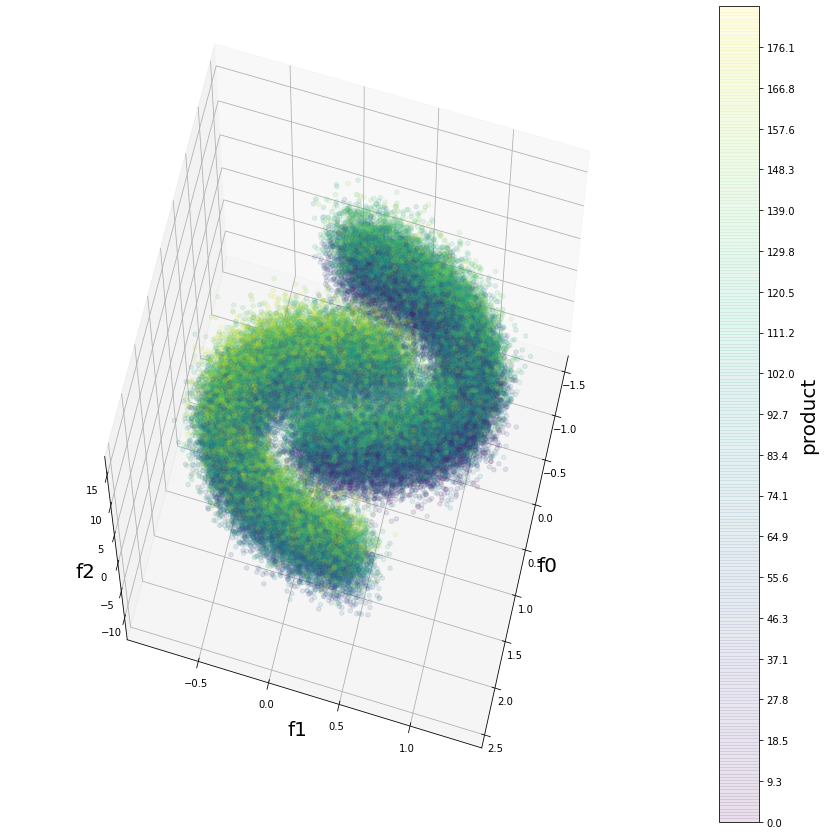

In [15]:
show_f0123_scatter(geo_data_0, elev=65, azim=15) #Region 0

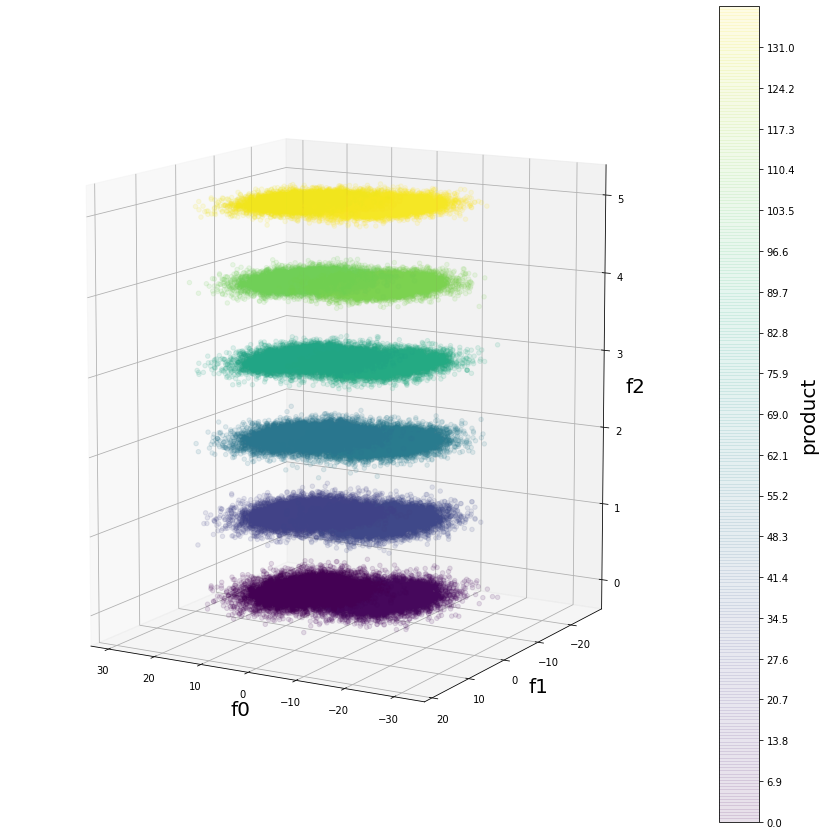

In [16]:
show_f0123_scatter(geo_data_1, elev=10, azim=120) #Region 1

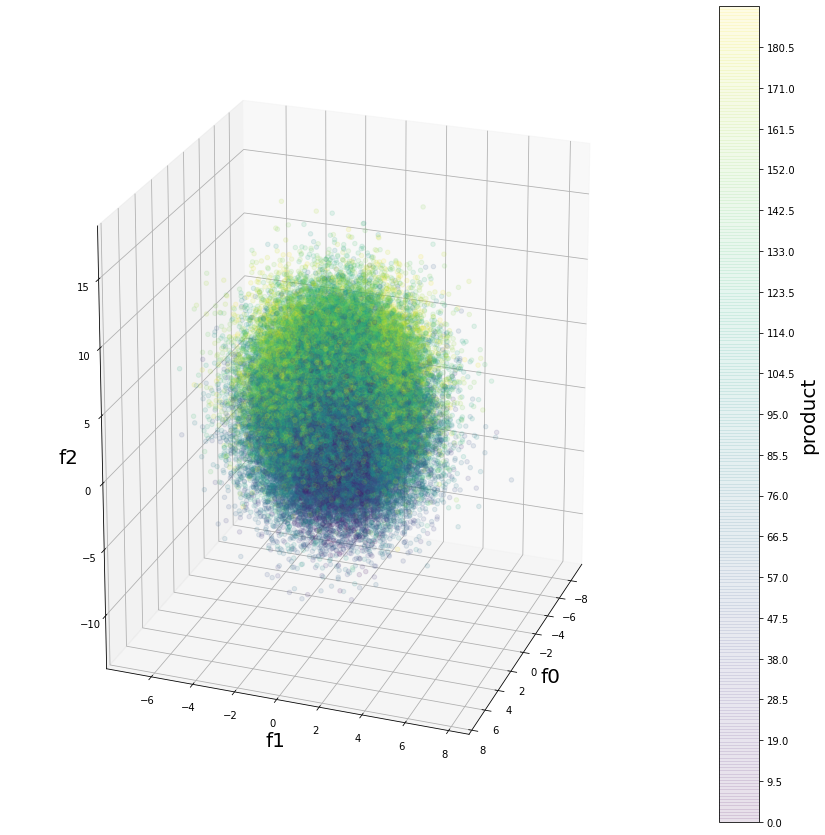

In [17]:
show_f0123_scatter(geo_data_2) #Region 2

## Preparation for profit calculation

We save all key values for calculations in separate variables:

- `well_count` - the number of explored points during exploration
- `best_count` - number of best points for development
- `revenue_per_unit` - income from each product unit
- `budget` - budget for well development in the region
- `bootstrap_count` - number of bootstrap fetches
- `well_cost` - calculated as `budget` / `best_count` - cost of developing one well
- `min_product` - calculated as `well_cost` / `revenue_per_unit` - the minimum amount of product in the well for its breakeven development

In [18]:
well_count = 500
best_count = 200
revenue_per_unit = 450000
budget = 10000000000
bootstrap_count = 1000
well_cost = budget / best_count
profitable_product = well_cost / revenue_per_unit

In [19]:
print('Sufficient volume of raw materials for break-even development of a new well: ', end='')
print('%.2f'%profitable_product, 'units')

Sufficient volume of raw materials for break-even development of a new well: 111.11 units


### Conclusion

We are ready to calculate the profit. Let us note that for break-even development of a well, it is necessary that it contains at least 111.11 units of the product. The average values of the product in the wells by region are significantly lower than this value. Thus, the choice of new wells for development should be approached with great responsibility, our model will help us with this.

## Profit and Risk Calculation

Let's define a function for calculating the profit for the selected wells and model predictions:
- Let's select wells with the maximum values of predictions.
- Sum the target value of the volume of raw materials corresponding to these predictions.
- Calculate the profit for the received volume of raw materials.

In [20]:
def revenue(data, count):
    predict_sorted = data['predict'].sort_values(ascending=False)
    selected = data['target'][predict_sorted.index][:count]
    return revenue_per_unit * selected.sum()

Let's define a function for calculating risks and rewards using the Bootstrap technique:

In [21]:
def bootstrap_calc(data, count):   
    values = []
    for i in range(count):
        subsample = pd.DataFrame()
        subsample['target'] = data['target'].sample(well_count, replace=True, random_state=state)
        subsample['predict'] = data['predict'][subsample['target'].index]
        rev = revenue(subsample, best_count)
        values.append(rev)
    values = pd.Series(values)
    return values

Let's define a function to display our calculations on the screen:

In [22]:
def print_mean_and_quantiles(values, quantile_lower=.025, quantile_higher=.975):
    lower = values.quantile(quantile_lower) / 1000000000
    mean = values.mean() / 1000000000
    higher = values.quantile(quantile_higher) / 1000000000
    risk = stats.percentileofscore(values, budget)
    print('Average revenue:', '%.2f'%mean, 'billion rubles')
    print(str(quantile_lower*100)+'%-quantile:', '%.2f'%lower, 'billion rubles')
    print(str(quantile_higher*100)+'%-quantile:', '%.2f'%higher, 'billion rubles')
    print('Loss risk:', '%.0f'%risk,'%')

### Region 0:

In [23]:
geo_0_bootstrap = bootstrap_calc(result_0, bootstrap_count)
print('Calculation of the mean and quantiles for region 0:')
print()
print_mean_and_quantiles(geo_0_bootstrap)

Calculation of the mean and quantiles for region 0:

Average revenue: 10.43 billion rubles
2.5%-quantile: 9.90 billion rubles
97.5%-quantile: 10.95 billion rubles
Loss risk: 6 %


### Region 1:

In [24]:
geo_1_bootstrap = bootstrap_calc(result_1, bootstrap_count)
print('Calculation of the mean and quantiles for region 1:')
print()
print_mean_and_quantiles(geo_1_bootstrap)

Calculation of the mean and quantiles for region 1:

Average revenue: 10.52 billion rubles
2.5%-quantile: 10.13 billion rubles
97.5%-quantile: 10.95 billion rubles
Loss risk: 0 %


### Region 2:

In [25]:
geo_2_bootstrap = bootstrap_calc(result_2, bootstrap_count)
print('Calculation of the mean and quantiles for region 2:')
print()
print_mean_and_quantiles(geo_2_bootstrap)

Calculation of the mean and quantiles for region 2:

Average revenue: 10.42 billion rubles
2.5%-quantile: 9.88 billion rubles
97.5%-quantile: 10.99 billion rubles
Loss risk: 6 %


### Conclusion:

We calculated the average revenues for the three regions and the risks of loss. The probabilities of loss for regions 0 and 2 are above 2.5%, while in region 1 the risks are below 2.5%. The expected revenue in regions 0 and 2 is almost the same. The expected revenue in region 1 is higher than in regions 0 and 2. Thus, region 1 is by far the best for development in terms of both expected revenue and risks.

## General conclusion:

The result is highly expected. Although in region 1 the average stocks of products in mines are significantly lower than in regions 0 and 2, in region 1 we can predict the values of the target feature with very high accuracy, since we use a linear regression model, and our target feature is linearly dependent on the feature f2 in region 1. This statement is not true for regions 0 and 2, so we do not make accurate predictions in them, which significantly affects the expected profit and significantly increases the risks.